Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Guillem Mata Valligny"
COLLABORATORS = "Enric Sintes Arguimbau"

---

# Activitat 2: Streaming - Adquisició i anàlisi de dades

## Introducció

En aquesta activitat, explorarem dues de les tecnologies més populars utilitzades per a l'adquisició i l'anàlisi de dades en temps real: Apache Kafka i Apache Spark Streaming. A través d'una sèrie d'exercicis, aprendréu els conceptes bàsics d'aquestes tecnologies i com utilitzar-les per processar dades en temps real.

## Estructura

Hem dividit aquesta activitat en tres parts:

1.  **Introducció a Apache Kafka**: En aquesta primera part, aprendréu els conceptes bàsics d'Apache Kafka, 
    els seus principals components i com interactuar-hi mitjançant la interfície de línia de comandes.
2.  **Ingesta de dades amb Apache Kafka**: En aquesta segona part, aprendréu a utilitzar Apache Kafka per 
    ingerir dades des d'un productor i consumir-les des d'un consumidor.
3.  **Processament de dades en temps real amb Apache Spark Streaming:** En aquesta tercera part, aprendréu 
    a utilitzar Apache Spark Streaming per processar dades en temps real provinents d'Apache Kafka.

## Notes importants:

- L'activitat s'ha de realitzar en **grups de 2 membres**. 
  Assegureu-vos de saber qui és el vostre company abans de començar l'activitat.
- Tot i que és possible completar les activitats directament en aquest quadern, **desaconsellem fer-ho** 
  degut a possibles problemes de rendiment del servidor. Veureu que cada activitat està continguda en la 
  seva pròpia cel·la, la qual cosa permetrà copiar-la fàcilment a un arxiu Python. Aquest arxiu es pot 
  **executar en un servidor utilitzant SSH o VSCode**. Un cop hagueu executat i provat l'script amb èxit, 
  simplement copieu-lo de nou a la cel·la corresponent del quadern. Aquest enfocament garanteix una execució 
  més fluida i una millor gestió dels recursos del servidor.
- En alguns exercicis, necessitareu **prendre captures de pantalla per justificar les vostres respostes**. Podeu     capturar imatges utilitzant les eines del sistema operatiu que feu servir: "Recortes" a Windows, "Imprimir         pantalla", `Ctrl+C` en seleccionar una imatge, etc. Un cop capturades, podeu enganxar les imatges directament a     les cel·les de resposta utilitzant `Ctrl+V` o el menú contextual que apareix fent clic dret, que permetrà           enganxar la imatge del portapapers. Per visualitzar la imatge, heu d'executar la cel·la.
- **Heu d'utilitzar únicament les biblioteques proporcionades, excepte si s'indica el contrari.**
- Si us plau, no canvieu el nom del quadern ni el tipus de les cel·les.


# Part I: Introducció a Apache Kafka (2 punts)

[Kafka](https://kafka.apache.org) és una plataforma distribuïda per gestionar esdeveniments en streaming que ens permet llegir, escriure i processar esdeveniments (registre o missatges, segons la terminologia de Kafka) distribuïts a través d'un clúster. 

Començarem l'activitat creant un tema anomenat activity2<usuari> en el servei de Kafka del nostre clúster (substitueix <usuari> pel teu nom d'usuari). Un tema és una col·lecció ordenada d'esdeveniments que s'emmagatzema de forma persistent, generalment en disc, i es distribueix i replica. Kafka tracta cada tema en cada partició com un registre (un conjunt ordenat de missatges). Cada missatge en una partició té un desplaçament únic, i aquests missatges tenen un **període de retenció predeterminat de 7 dies (604,800,000 ms)**, tot i que pots modificar-lo en el moment de la creació del tema.

Kafka funciona basat en [Zookeeper](https://zookeeper.apache.org), que gestiona clústers per proporcionar serveis de coordinació a aplicacions distribuïdes. Zookeeper està ubicat en el servidor al qual et connectes, és a dir, en localhost, i el seu port és el 2181. Els brokers de Kafka són **Cloudera02 i Cloudera03**, accessibles pel port estàndard **9092**.


## Exercici 1: Crear un tema amb Kafka (0.25 punts)

Crea un tema de Kafka anomenat `activity2<usuari>` en el nostre clúster amb un factor de replicació de 1 i una única partició, el que significa que farem servir un sol node per emmagatzemar els missatges que rep Kafka. A més, especifica que els missatges només s'emmagatzemin durant 2 hores en el tema.

In [5]:
from kafka.admin import KafkaAdminClient, NewTopic, ConfigResource

topic_name = "activity2gmatav"

admin_client = KafkaAdminClient(
    bootstrap_servers="Cloudera02:9092", 
    client_id='test'
)

# Creació del tema, factor de replicació 1 , única partició
topic_config = {'retention.ms': '7200000'}  # Missatges només s'emmagatzemen durant 2 hores en el tema
topic = NewTopic(name=topic_name, num_partitions=1, replication_factor=1, topic_configs=topic_config)
admin_client.create_topics(new_topics=[topic])

admin_client.close()

## Exercici 2: Llista els temes de Kafka (0.25 punts)

Consulta el tema que acabes de crear i mostra'l.

In [6]:
# Consutem el tema i mostra per pantalla
topic = admin_client.describe_topics(["activity2gmatav"])
print(topic)
admin_client.close()

KeyboardInterrupt: 

## Exercici 3: Elimina el tema de Kafka (0.25 punts)

Elimina el *tema* que vas crear en l'Exercici 1.

In [8]:
# Eliminar el tema creat
admin_client.delete_topics(topics=['activity2gmatav'])

DeleteTopicsResponse_v3(throttle_time_ms=0, topic_error_codes=[(topic='activity2gmatav', error_code=0)])

## Exercici 4: Descriu el tema de Kafka (0.25 punts)

Torna a crear el *tema* anomenat activity2<usuari> seguint els mateixos passos que en l'Exercici 1. Un cop creat, utilitza la línia de comandes de Kafka per descriure'l i comprovar-ne la configuració.

In [9]:
from kafka.admin import KafkaAdminClient, NewTopic, ConfigResource

# Tornem a crear el tema 
topic_name = "activity2gmatav"


admin_client = KafkaAdminClient(
    bootstrap_servers="Cloudera02:9092", 
    client_id='test'
)

topic_config = {'retention.ms': '7200000'}  
topic = NewTopic(name=topic_name, num_partitions=1, replication_factor=1, topic_configs=topic_config)
admin_client.create_topics(new_topics=[topic])

# Descriu el tema creat amb linea de comandes Kafka
!/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/kafka/bin/kafka-topics.sh \
--describe \
--topic activity2gmatav \
--zookeeper Cloudera01:2181/kafka

Topic:activity2gmatav	PartitionCount:1	ReplicationFactor:1	Configs:retention.ms=7200000
	Topic: activity2gmatav	Partition: 0	Leader: 95	Replicas: 95	Isr: 95


## Exercici 5: Crea un productor en Kafka (0.5 punts)

Anem a crear un esdeveniment en el tema. Recorda que aquest comandament s'ha d'executar des de la terminal per interactuar. Recorda utilitzar `CTRL+c` quan hagis acabat d'enviar els missatges.

In [18]:
/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/kafka/bin/kafka-console-producer.sh \--broker-list Cloudera02:9092 \--topic activity2gmatav

>^C
org.apache.kafka.common.KafkaException: Producer closed while send in progress
	at org.apache.kafka.clients.producer.KafkaProducer.doSend(KafkaProducer.java:864)
	at org.apache.kafka.clients.producer.KafkaProducer.send(KafkaProducer.java:841)
	at kafka.tools.ConsoleProducer$.send(ConsoleProducer.scala:75)
	at kafka.tools.ConsoleProducer$.main(ConsoleProducer.scala:57)
	at kafka.tools.ConsoleProducer.main(ConsoleProducer.scala)
Caused by: org.apache.kafka.common.KafkaException: Requested metadata update after close
	at org.apache.kafka.clients.Metadata.awaitUpdate(Metadata.java:200)
	at org.apache.kafka.clients.producer.KafkaProducer.waitOnMetadata(KafkaProducer.java:981)
	at org.apache.kafka.clients.producer.KafkaProducer.doSend(KafkaProducer.java:861)
	... 4 more


## Exercici 6: Crea un consumidor a Kafka (0.5 punts)

Finalment, es demana consultar els missatges enviats a través de la terminal utilitzant el consumidor incorporat de Kafka per al tema. Concretament, has d'executar un consumidor connectant-te als diferents brokers existents i especificant el tema i la partició als quals s'han enviat els missatges. Pots obrir dues terminals i verificar que els missatges enviats amb el productor al broker poden ser visualitzats amb el consumidor de consola.

In [16]:
/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/kafka/bin/kafka-console-consumer.sh \
--bootstrap-server Cloudera02:9092 \
--topic activity2gmatav \
--from-beginning


Hola, Kafka!
Hola KAFKA !!!!
QUe tal EStas
Jo estic Be
^C
Processed a total of 4 messages


# Part II: Ingesta de dades con Apache Kafka (1.5 punts)

Per automatitzar la generació i consum de dades, és comú treballar amb un llenguatge de programació com Python, en lloc de fer-ho directament en Bash. En les següents preguntes, explorarem la funcionalitat de Kafka utilitzant Python amb la biblioteca per defecte, que **NO HAGIS D'INSTAL·LAR, ja que ja està disponible en la versió correcta.**
Pots trobar tota la documentació associada amb l'API proporcionada a [Kafka](https://kafka-python.readthedocs.io/en/master/). 
Començarem amb els conceptes bàsics que ja hem cobert: escriure en el tema de Kafka. 
Per fer-ho, configurarem [Kafka
producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) producer que inserirà valors numèrics en un tema de Kafka cada 3 segons. Mentre el productor escriu, procedirem a llegir els missatges en la pregunta 8.

## Exercici 7: Escriu un tema a Kafka (0.5 punts)

Se't demana escriure una seqüència numèrica de 300 nombres (del 1 al 300) en el tema de Kafka activity2<usuari> que acabem de crear. Cada un dels missatges escrits en el tema ha de contenir informació sobre el tema on s'escriuen, una clau i el valor binari del nombre a escriure (per exemple, value=b'287'). 

És essencial revisar l'API associada amb el [Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html)per completar aquests exercicis.

Per guiar-te en l'exercici, et proporcionem una plantilla que pots utilitzar per completar-ho. Has de completar les parts mancants del codi a la cel·la de codi a continuació.

   

In [ ]:
from kafka import KafkaProducer
import numpy as np
<FILL_IN>
for i in range(1,300):
    <FILL_IN>
producer.flush()

In [19]:
from kafka import KafkaProducer
import numpy as np



producer = KafkaProducer(
    bootstrap_servers=['Cloudera02:9092'],
    key_serializer=lambda k: k.encode('utf-8'), 
    value_serializer=lambda v: v.encode('utf-8') 
)


for i in range(1, 301):
    key = 'key-{}'.format(i)  
    value = '{}'.format(i)  
    producer.send('activity2gmatav', key=key, value=value)

producer.flush()
producer.close()

## Exercici 8: Llegir un tema de Kafka (1 punt)

Utilitzant la biblioteca de Python per a Kafka, 
[Kafka](https://kafka-python.readthedocs.io/en/master/),
llegeix els missatges enviats en l'exercici 7, mostrant només els valors, 
no les altres propietats del missatge. És important revisar l'ús de Kafka en 
([Python](https://kafka-python.readthedocs.io/en/master/usage.html))i els paràmetres del consumidor de 
[Kafka
consumer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaConsumer.html). consumer.

Com en l'exercici anterior, aquí et proporcionem una plantilla que pots utilitzar per completar l'exercici. Has de completar les parts mancants del codi.

In [ ]:
from kafka import KafkaConsumer
<FILL_IN>
for message in consumer:
    <FILL_IN>

In [20]:
from kafka import KafkaConsumer


consumer = KafkaConsumer('activity2gmatav',
                         group_id='GrupStreaming5',
                         bootstrap_servers=['Cloudera02:9092'],
                         consumer_timeout_ms=10000
                        )
# Mostrem els valors dels missatges enviats
for message in consumer:
   
   print(message.value.decode('utf-8'))
                                          

Hola KAFKA !!!!
QUe tal EStas
Jo estic Be
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
26

# Part III: Procesament de dades en temps real amb Apache Spark Streaming (6.5 punts)


En aquesta part de l'activitat, ens centrarem en l'ús d'Apache Spark per processar dades en temps real. Aquí, utilitzarem:

- [Spark Streaming](https://archive.apache.org/dist/spark/docs/2.4.0/streaming-programming-guide.html): 
  Spark Streaming és un motor de processament de fluxos escalable i tolerant a fallades, construït sobre Apache       Spark. Permet el processament de dades en temps real amb alta capacitat de rendiment i baixa latència. 
  Amb Spark Streaming, pots realitzar anàlisis en temps real, aprenentatge automàtic i processament de grafos sobre   dades en streaming.
- [Spark Structured Streaming](https://archive.apache.org/dist/spark/docs/2.4.0/structured-streaming-programming-     guide.html): Structured Streaming és una API d'alt nivell per al processament de fluxos en Spark. 
  Proporciona una interfície declarativa i similar a SQL per processar dades de streaming estructurades. 
  Amb Structured Streaming, pots escriure consultes de streaming que s'integren de manera fluida amb el               processament per lots, permetent-te construir pipelines de processament de dades de punta a punta.

En aquesta part de l'activitat, ens centrarem en la xarxa social Mastodon per processar les seves dades en streaming. És una bona idea familiaritzar-se amb l'estructura JSON d'un "toot".(consulta el link [Mastodon\'s API
webpage](https://docs.joinmastodon.org/entities/Status/)), per facilitar la comprensió dels diferents exercicis que proposem.

**Notes importants:**

- Tingues en compte que, en utilitzar la versió 2.4.0 d'Apache Spark, pot haver-hi diferències en l'API i altres característiques en comparació amb les versions més recents. Assegura't de consultar la documentació específica per a aquesta versió quan necessitis més detalls.

- Recorda adjuntar una captura de pantalla del resultat de l'execució de cada exercici en aquesta part de l'activitat.
    

## Exercici 10: Spark Streaming (3.5 punts)

En aquest exercici, analitzaràs l'activitat a Mastodon comptant els toots en una finestra de temps. Comptar és una de les operacions fonamentals en Spark, i en aquesta activitat, aprofitarem la biblioteca de Spark Streaming per millorar les nostres capacitats de recompte.

### Exercici 10.1: Counting in Windows (0.5 punts)

Com ja sabràs, la biblioteca Spark Streaming **processa les dades utilitzant el concepte de time windows**, agrupant els elements de dades segons el temps en què van ser rebuts. Aquest enfocament permet el processament per lots de dades de streaming, habilitant anàlisis **sobre intervals de temps diferents**. Veuràs que la sintaxi per realitzar operacions sobre els RDDs dins d'aquestes finestres de temps és **pràcticament equivalent a les operacions estàndard d'RDD que ja coneixes.**

Completa el codi a continuació per obtenir **el nombre de toots originals publicats cada cinc segons**. Exclou els retweets del teu recompte. Potser necessitaràs consultar [Mastodon
API](https://docs.joinmastodon.org/entities/Status/) per entendre com estan estructurats els toots.


In [25]:
import findspark
findspark.init()
import json 
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils

    
# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "NombreDeToots"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName = app_name)
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera02:9092"  # Kafka server address
kafka_topic = "mastodon_toots"   # Kafka topic
kafka_group = "GrupStreaming5"   # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}

# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(  ssc, [kafka_topic],kafkaParams)


# Count each toot as 1 and update the total count
tootCounts = kafkaStream \
    .map(lambda x: json.loads(x[1])) \
    .filter(lambda toot: not toot.get("reblog")) \
    .map(lambda toot: ("toot", 1)) \
    .reduceByKeyAndWindow(lambda a, b: a + b, lambda a, b: a - b, 5, 5)

# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

-------------------------------------------
Time: 2024-12-04 20:59:55
-------------------------------------------

-------------------------------------------
Time: 2024-12-04 21:00:00
-------------------------------------------

-------------------------------------------
Time: 2024-12-04 21:00:05
-------------------------------------------



Adjunta la captura de pantalla de la sortida **aquí**

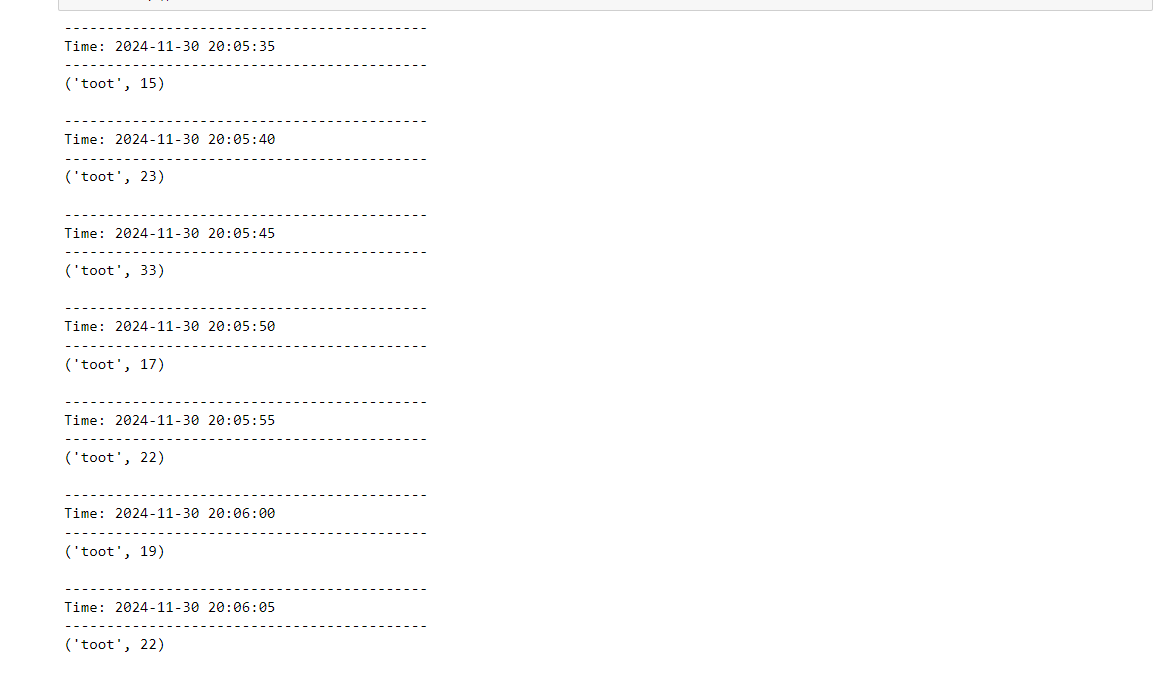

### Exercici 10.2: Comptant Toots per Idioma (0.5 punts)


Com vas observar a l'Exercici 2.1, el procés és força similar a treballar amb RDDs. Ara, anem a aprofundir en una anàlisi més complexa per **comptar quants toots originals es creen per idioma cada 5 segons**. Per millorar la llegibilitat, et demanem que ordenis els idiomes en ordre descendent segons el nombre de toots i limitis la sortida als 10 principals idiomes.

In [24]:
import findspark
findspark.init()
import json

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "Toots_per_Idioma"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName = app_name)
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = "Cloudera02:9092"  # Kafka server address
kafka_topic = "activity2gmatav"   # Kafka topic
kafka_group = "GrupStreaming5"   # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}

# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(ssc, [kafka_topic], kafkaParams)

# Count the number of toots per language
tootLangCounts = kafkaStream\
    .map(lambda x: json.loads(x[1])) \
    .filter(lambda toot: not toot.get("reblog", False)) \
    .map(lambda toot: (toot.get("language", "unknown"), 1)) \
    .reduceByKeyAndWindow(lambda a, b: a + b, lambda a, b: a - b, 5, 5)


# Print the cumulative count
tootLangCounts.pprint(tootLangCounts \
    .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False)) \
    .transform(lambda rdd: sc.parallelize(rdd.take(10))))

                      
# Start the computation       
try:
    ssc.start()  
    ssc.awaitTermination()  
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

Traceback (most recent call last):
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/serializers.py", line 587, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/usr/lib/python3.5/pickle.py", line 408, in dump
    self.save(obj)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 725, in save_tuple
    save(element)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 406, in save_fun

Py4JJavaError: An error occurred while calling o1731.start.
: java.io.IOException: org.apache.spark.SparkException: An exception was raised by Python:
Traceback (most recent call last):
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/serializers.py", line 587, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/usr/lib/python3.5/pickle.py", line 408, in dump
    self.save(obj)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 725, in save_tuple
    save(element)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 406, in save_function
    self.save_function_tuple(obj)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 549, in save_function_tuple
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 770, in save_list
    self._batch_appends(obj)
  File "/usr/lib/python3.5/pickle.py", line 797, in _batch_appends
    save(tmp[0])
  File "/usr/lib/python3.5/pickle.py", line 520, in save
    self.save_reduce(obj=obj, *rv)
  File "/usr/lib/python3.5/pickle.py", line 623, in save_reduce
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 520, in save
    self.save_reduce(obj=obj, *rv)
  File "/usr/lib/python3.5/pickle.py", line 623, in save_reduce
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 495, in save
    rv = reduce(self.proto)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/context.py", line 321, in __getnewargs__
    "It appears that you are attempting to reference SparkContext from a broadcast "
Exception: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/streaming/util.py", line 115, in dumps
    func.func, func.rdd_wrap_func, func.deserializers)))
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/serializers.py", line 597, in dumps
    raise pickle.PicklingError(msg)
_pickle.PicklingError: Could not serialize object: Exception: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.

	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1336)
	at org.apache.spark.streaming.api.python.TransformFunction.writeObject(PythonDStream.scala:100)
	at sun.reflect.GeneratedMethodAccessor19.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1140)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeArray(ObjectOutputStream.java:1378)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1174)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.defaultWriteObject(ObjectOutputStream.java:441)
	at org.apache.spark.streaming.DStreamGraph$$anonfun$writeObject$1.apply$mcV$sp(DStreamGraph.scala:187)
	at org.apache.spark.streaming.DStreamGraph$$anonfun$writeObject$1.apply(DStreamGraph.scala:182)
	at org.apache.spark.streaming.DStreamGraph$$anonfun$writeObject$1.apply(DStreamGraph.scala:182)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1329)
	at org.apache.spark.streaming.DStreamGraph.writeObject(DStreamGraph.scala:182)
	at sun.reflect.GeneratedMethodAccessor66.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at java.io.ObjectStreamClass.invokeWriteObject(ObjectStreamClass.java:1140)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1496)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.defaultWriteFields(ObjectOutputStream.java:1548)
	at java.io.ObjectOutputStream.writeSerialData(ObjectOutputStream.java:1509)
	at java.io.ObjectOutputStream.writeOrdinaryObject(ObjectOutputStream.java:1432)
	at java.io.ObjectOutputStream.writeObject0(ObjectOutputStream.java:1178)
	at java.io.ObjectOutputStream.writeObject(ObjectOutputStream.java:348)
	at org.apache.spark.streaming.Checkpoint$$anonfun$serialize$1.apply$mcV$sp(Checkpoint.scala:152)
	at org.apache.spark.streaming.Checkpoint$$anonfun$serialize$1.apply(Checkpoint.scala:152)
	at org.apache.spark.streaming.Checkpoint$$anonfun$serialize$1.apply(Checkpoint.scala:152)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1363)
	at org.apache.spark.streaming.Checkpoint$.serialize(Checkpoint.scala:153)
	at org.apache.spark.streaming.StreamingContext.validate(StreamingContext.scala:525)
	at org.apache.spark.streaming.StreamingContext.liftedTree1$1(StreamingContext.scala:573)
	at org.apache.spark.streaming.StreamingContext.start(StreamingContext.scala:572)
	at org.apache.spark.streaming.api.java.JavaStreamingContext.start(JavaStreamingContext.scala:556)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: An exception was raised by Python:
Traceback (most recent call last):
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/serializers.py", line 587, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/usr/lib/python3.5/pickle.py", line 408, in dump
    self.save(obj)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 725, in save_tuple
    save(element)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 406, in save_function
    self.save_function_tuple(obj)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/cloudpickle.py", line 549, in save_function_tuple
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 770, in save_list
    self._batch_appends(obj)
  File "/usr/lib/python3.5/pickle.py", line 797, in _batch_appends
    save(tmp[0])
  File "/usr/lib/python3.5/pickle.py", line 520, in save
    self.save_reduce(obj=obj, *rv)
  File "/usr/lib/python3.5/pickle.py", line 623, in save_reduce
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 520, in save
    self.save_reduce(obj=obj, *rv)
  File "/usr/lib/python3.5/pickle.py", line 623, in save_reduce
    save(state)
  File "/usr/lib/python3.5/pickle.py", line 475, in save
    f(self, obj) # Call unbound method with explicit self
  File "/usr/lib/python3.5/pickle.py", line 810, in save_dict
    self._batch_setitems(obj.items())
  File "/usr/lib/python3.5/pickle.py", line 836, in _batch_setitems
    save(v)
  File "/usr/lib/python3.5/pickle.py", line 495, in save
    rv = reduce(self.proto)
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/context.py", line 321, in __getnewargs__
    "It appears that you are attempting to reference SparkContext from a broadcast "
Exception: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/streaming/util.py", line 115, in dumps
    func.func, func.rdd_wrap_func, func.deserializers)))
  File "/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark/python/pyspark/serializers.py", line 597, in dumps
    raise pickle.PicklingError(msg)
_pickle.PicklingError: Could not serialize object: Exception: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.

	at org.apache.spark.streaming.api.python.PythonTransformFunctionSerializer$.serialize(PythonDStream.scala:144)
	at org.apache.spark.streaming.api.python.TransformFunction$$anonfun$writeObject$1.apply$mcV$sp(PythonDStream.scala:101)
	at org.apache.spark.streaming.api.python.TransformFunction$$anonfun$writeObject$1.apply(PythonDStream.scala:100)
	at org.apache.spark.streaming.api.python.TransformFunction$$anonfun$writeObject$1.apply(PythonDStream.scala:100)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1329)
	... 61 more


Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 10.3: Mantenint el Comptatge (0.5 punts)


Fins ara, hem estat obtenint resultats específics de lots, la qual cosa és generalment útil. Però, què passa si vols obtenir una visió més àmplia, mantenint la informació a través de les finestres per, per exemple, acumular tendències al llarg del temps? Aquest és l'enfocament de la nostra pròxima exploració.

En aquest exercici, et convidem a modificar l'script anterior per **mantenir un comptatge acumulat de tots els toots originals, categorizats per idioma**. En lloc de simplement comptar nous toots cada cinc segons, anem a **sumar-los contínuament**. Pensa en això com un marcador que s'actualitza constantment amb el nombre total de toots originals en cada idioma des del moment en què comencem a fer streaming.

Per aconseguir-ho, treballarem amb les transformacions
[**stateful transformations in Spark Streaming**](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#caching--persistence).
Això és una forma sofisticada de dir que recordarem les dades passades i les utilitzarem en els nostres càlculs actuals. És similar a mantenir un total acumulat en una variable global en lloc de començar des de zero cada vegada.

**Et convidem a completar l'script següent:**

In [2]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = <FILLIN>  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName="app_name")
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName="app_name")

sc.setLogLevel("ERROR")

batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(<FILLIN>)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = <FILLIN>  # Kafka server address
kafka_topic = <FILLIN>   # Kafka topic
kafka_group = <FILLIN>   # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}


# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(<FILLIN>)

# Update the cumulative count using updateStateByKey
def updateFunction(newValues, runningCount):
    <FILLIN>
    return <FILLIN>

# Count each toot as 1 and update the total count
tootCounts = kafkaStream\
    .map(lambda x: json.loads(x[1]))\
    .<FILLIN>
    ....
    .<FILLIN>
    .updateStateByKey(<FILLIN>)\
    <FILLIN>

# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

SyntaxError: invalid syntax (<ipython-input-2-1e2668bd79a1>, line 10)

Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 10.4: Windowed Counting (1 punt)

Com has observat, Spark Streaming és increïblement flexible i fàcil d'utilitzar, i aquí tens un truc interessant que pot realitzar: **et permet trobar un punt intermedi entre comptar toots [time window](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#window-operations) i mantenir un total acumulat**. Imaginem que volem crear un panell de control, com un tauler, que mostri el nombre de toots realitzats en cada idioma. 
El gir és que **volem que aquesta actualització es produeixi cada 5 segons, però estem rastrejant els comptatges durant un minut complet.**

Així, cada 5 segons, el nostre panell s'actualitza, proporcionant-nos l'últim comptatge acumulat durant un minut. És com tenir un marcador en viu que s'actualitza amb freqüència i també realitza un seguiment del que ha ocorregut en els últims 60 segons, no només en els últims 5. D'aquesta manera, obtens tant actualitzacions immediates com una vista més àmplia del que està succeint, tot al mateix temps. Mostra només els 10 principals idiomes.

**Modifica l'script següent per aconseguir aquest objectiu:**


In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.streaming.kafka import KafkaUtils
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "FILLIN"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[2]", appName="app_name")
except ValueError:
    sc.stop()
    sc = SparkContext("local[2]", appName="app_name")

sc.setLogLevel("ERROR")

ssc = StreamingContext(<FILLIN>)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Define Kafka parameters
kafka_server = <FILLIN>  # Kafka server address
kafka_topic = <FILLIN>   # Kafka topic
kafka_group = <FILLIN>         # Kafka consumer group, first surname of each member of the group separated by an underscore.

kafkaParams = {
    "metadata.broker.list": kafka_server,
    "group.id": kafka_group
}


# Create a DStream that connects to Kafka
kafkaStream = KafkaUtils.createDirectStream(<FILLIN> )

# Count each toot as 1 and update the total count. Use a 60-second window with a 5-second slide
tootCounts = kafkaStream\
    .<FILLIN>

# Print the cumulative count
tootCounts.pprint()

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 10.5: Powering Up (1 punt)

Molt bé, ja sabem que els RDDs en Spark són increïblement versàtils: són com la navalla suïssa del processament de dades de stream. Pots fer pràcticament qualsevol operació amb ells. No obstant això, **a mesura que les coses es tornen més complexes, el desafiament augmenta.**

Ara, farem que el nostre panell de control sigui encara més interessant. 
En lloc de només mostrar quants toots tenim per minut, afegim algunes característiques noves. No seria interessant **rastrejar la longitud mitjana d'aquests toots?**
I hi ha més: anem a descobrir **qui és l'usuari més seguit entre els que han tootejat en aquest minut.**

Espera, **hi ha més!** Per fer tota aquesta informació súper fàcil de llegir i entendre, la presentarem en un format de taula ordenat i net. No es tracta només de les dades, sinó de fer-les amigables per a l'usuari i visualment digeribles.

La taula resultant s'ha d'actualitzar en intervals de 5 segons, i les finestres de mitjana han de ser de 60 segons. Les columnes d'aquesta taula han de ser:

-   **`lang`:** Idioma
-   **`num_toots`:** Nombre de toots originals en aquest idioma
-   **`avg_len_content`:** Longitud mitjana (en caràcters) del contingut del toot
-   **`user`:** Usuari més seguit
-   **`followers`:** Nombre de seguidors d'aquest usuari

Per fer que la sortida sigui més llegible, limita el nombre de files a 10.

**TIP:** Hi ha un exemple molt útil a [Spark
Streaming](https://spark.apache.org/docs/2.4.0/streaming-programming-guide.html#dataframe-and-sql-operations).. ¡Búsca'l!


In [ ]:
<FILL IN>

Adjunta la captura de pantalla de la sortida **aquí**

## Exercici 11: Structured Streaming (3 punts)

Com has vist en l'últim exercici, depenent de les operacions, l'API de Spark Streaming pot no resultar tan convenient, especialment perquè has de tractar amb APIs de baix nivell. Afortunadament, **Spark provides a
high-level API called [Spark Structured
Streaming](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html)** que et permet expressar els càlculs de streaming de la mateixa manera que expressaries un càlcul per lots sobre dades estructurades estàtiques, com les que faries servir en el processament per lots.

En aquest conjunt d'exercicis, t'endinsaràs en el fascinant món de Spark Structured Streaming.

### Exercici 11.1: Obtenint l'Esquema (0.5 punts)

Una de les característiques més interessants de Spark Structured Streaming és **com gestiona les dades estructurades**. Per exemple, el flux de dades en el nostre tema de Kafka, on **cada "toot" arriba en un format JSON ordenat**, cosa que el fa estructurat i organitzat.

De manera similar a com es treballa amb DataFrames en Spark, **Structured Streaming utilitza esquemes de dades per analitzar dades estructurades**, essencialment un plànol de com estan disposades les dades. Per al processament per lots, Spark pot sovint deduir aquesta estructura directament de les dades. No obstant això, amb les dades de streaming, és una mica diferent: **necessitem definir aquesta estructura per endavant**.

En els següents exercicis, utilitzarem un truc convenient: **en lloc de definir manualment** l'estructura complexa d'un "toot", inicialment **extraiem alguns toots de Kafka i els analitzem en un lot per aprendre el seu esquema**. És com fer una ullada per entendre com estan organitzades les coses. Un cop tinguem l'esquema, l'aplicarem al nostre pipeline de streaming.

La teva tasca en aquest exercici és realitzar aquesta transformació. Després, utilitzant les operacions de DataFrame amb les quals ja estàs familiaritzat, crearàs una taula amb les següents columnes que ens permetrà veure els toots individualment a mesura que es processen:


-   **`id`:** Identificador únic per a cada toot
-   **`created_at`:** Data i hora en què es va crear el toot
-   **`content`:** El contingut del toot
-   **`language`:** L'idioma del toot
-   **`username`:** El nomb d'usuari de l'autor del toot
-   **`followers_count`:** Nombre de seguidors de l'autor.


Recorda que ens **interessen els toots originals**. Filtra aquells que són retweets.

Un altre aspecte fonamental que has de gestionar aquí és **seleccionar l'outputMode adequat**. Consulta la [the documentation](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#output-modes) i tria el que millor s'adapti a aquest exercici.


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1" + <FILLIN> # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = <FILLIN>
kafka_bootstrap_servers = <FILLIN>  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .option("endingOffsets", "{\"" + kafka_topic + "\":{\"0\":10}}") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", <FILLIN>) \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .select(<FILLIN>)

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode(<FILLIN>) \
            .format("console")\
            .start()

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 11.2: Agregant Dades des d'un Flux (0.5 punts)


Spark Structured Streaming és realment potent, especialment quan es realitzen operacions sobre un flux continu de dades. En aquest exercici, aprofundirem en Structured Spark Streaming, enfocant-nos específicament en l'agregació de dades des d'un flux de Kafka. És similar al que vam fer en l'Exercici 2. La teva missió és **comptar el nombre de toots originals en cada idioma.**

Aquí et mostrem com hauria de ser la teva sortida:

-   **`language`:** Aquesta columna mostra l'idioma dels toots.
-   **`count`:** Aquí és on mostraràs el nombre de toots per cada idioma.

La teva taula **ha d'acumular aquests comptatges cada 10 segons, i també ha de seguir acumulant-los**. A més, fes-la amigable per a l'usuari **ordenant els idiomes pel nombre de toots, amb els idiomes més conversadors a la part superior.**

Ara, aquí hi ha una **part clau** d'aquest exercici: **necessites triar el mode de sortida adequat per a la teva consulta de streaming**. Recorda, el mode de **sortida determina com s'escriu cada lot de dades resultant en la destinació de sortida**. Les teves opcions són els modes 'Complete', 'Append' i 'Update'. Pensa quin encaixa millor per al nostre escenari de comptatge acumulatiu i ordenat. I **no oblidis escriure el teu raonament en els comentaris.**


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, window
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_2" + <FILLIN> # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = <FILLIN>
kafka_bootstrap_servers = <FILLIN>  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .option("endingOffsets", "{\"" + kafka_topic + "\":{\"0\":10}}") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", <FILLIN>) \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .filter(<FILLIN>)\
    .select(<FILLIN>)\
    .groupBy(<FILLIN>)\
    .<FILLIN>
    ...
    <FILLIN>


try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode(<FILLIN>) \
            .format("console")\
            .<FILLIN>
            ...
            .<FILLIN>
            .trigger(<FILLIN>)\
            .start()\

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 11.3: Windowed Counting (1 punt)

Bona feina! Has après a realitzar agregacions i a fer un seguiment dels comptatges al llarg del temps. Com vas notar a l'Exercici 2.4, de vegades és més efectiu mantenir aquests comptatges en **specific time windows**. Ara, volem que apliquis aquesta tècnica utilitzant [functions available in Spark Structured
Streaming](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#window-operations-on-event-time). 
Tingues en compte que Spark Structured Streaming gestiona el temps de manera diferent de Spark Streaming, per la qual cosa hauràs de considerar això a l'hora d'analitzar i interpretar els resultats.

La teva tasca és **crear una taula que mostri un comptatge de la quantitat de toots originals (recorda filtrar els retweets) realitzats en cada idioma, segmentats dins d'un marc de temps específic**. Per a aquest exercici, has d'utilitzar una finestra lliscant d'un minut, amb les dades refrescant-se cada 5 segons. Aquest enfocament et permetrà monitorar de prop la freqüència dels toots en diferents idiomes al llarg d'intervals breus i superposats.

Et demanem que proporcionis una taula amb l'estructura següent:

- **`window`:** Mostra el rang de temps
- **`language`:** Aquesta columna mostra l'idioma dels toots
- **`count`:** Aquí és on mostraràs el nombre de toots per a cada idioma

Els resultats han de **ordenar-se per finestra de temps i comptatge en ordre descendent.**


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col, window
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_3" + <FILLIN> # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = <FILLIN>
kafka_bootstrap_servers = <FILLIN>  # Replace with your Kafka bootstrap servers

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .option("endingOffsets", "{\"" + kafka_topic + "\":{\"0\":10}}") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", <FILLIN>) \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .filter(<FILLIN>)\
    .select(<FILLIN>)\
    .groupBy(
        window(<FILLIN>),
        <FILLIN>
    )\
    .count()\
    .orderBy(<FILLIN>, <FILLIN>, ascending=False)

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode(<FILLIN>) \
            .format("console")\
            .option("truncate", "false")\
            .trigger(<FILLIN>)\
            .start()\

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

Adjunta la captura de pantalla de la sortida **aquí**

### Exercici 11.4: Unir Fluxes (1 punt)

En aquest últim exercici, explorarem una característica molt interessant de Spark Streaming que et permet **[unir dos streams](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins) i analitzar-los!**

Per simplificar les coses, ja et proporcionem dos fluxos de dades pre-agregats.
El primer, que es troba al tema de Kafka **`mastodon_toots_original_domain`**, mostra el comptatge de toots originals per a diverses instàncies de Mastodon (recorda que Mastodon és una federació d’instàncies) durant **fixed one-minute window**. 

El segon flux, en el **`mastodon_toots_retoot_domain` topic**, presenta dades similars, però per als toots que són retweets (compartits) d’altres toots. Les dades emmagatzemades en els temes de Kafka tenen la mateixa estructura en format JSON:

- Una `window` estructura con dos elements `string` type: `start` i `end` 
- Un component `string` anomenat `mastodon_instance` amb el topic.
- Un element de tipus `integer` anomenat `count`amb el nombre de toots realitzats en aquest domini en el rang de     temps específic

Com que l’estructura de les dades és força senzilla, aquesta vegada **et demanem que la defineixis manualment**, en lloc d’utilitzar el truc de batch. Un cop hagis configurat les estructures, **hauràs d’obrir un flux per a cada font de Kafka.** El següent pas és unir aquests fluxos. Volem que facis un **left join del flux de toots originals amb el flux de retweets.** Un cop completada la unió, la teva sortida ha d’incloure:

- **`window`:** el rang de temps
- **`mastodon_instance`:** el domini de la instància de Mastodon
- **`original_count`:** nombre de toots originals publicats en aquest domini durant aquest rang de temps
- **`retweet_count`:** nombre de toots de retweets publicats en aquest domini durant aquest rang de temps


**TIP**: Realitzar una unió en línia de dos fluxos no és una tasca fàcil, i hi ha moltes restriccions que has de respectar.
[the
documentation](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins)
y recorda que estem utilitzant la versió 2.4.0. 
A més, recorda que estem realitzant **una join over time**, i aquest és un component **clau**. Conceptes com els que has après sobre windows són fonamentals juntament amb conceptes com [with concepts like
watermarking](https://spark.apache.org/docs/2.4.0/structured-streaming-programming-guide.html#stream-stream-joins).
I recorda, **els modes de sortida són complicats**, i has de triar-ne un que sigui adequat per a la tasca que vols fer.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, window, to_timestamp, struct
from pyspark.sql import SparkSession

# Initialize Spark Context
conf = SparkConf()
conf.setMaster("local[2]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_4" + <FILLIN> # Replace with your Spark app name must include the username of the members of the group

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define schema for the incoming data
schema = StructType(<FILLIN>)

# Define Kafka parameters
toots_original_topic = <FILLIN>
toots_retoot_topic = <FILLIN>
kafka_bootstrap_servers = <FILLIN>  # Replace with your Kafka bootstrap servers

# Create streaming DataFrame by reading original toots data from Kafka
toots_original = spark \
    .readStream \
    .<FILLIN>
    ...
    .<FILLIN>
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_original_df = toots_original\
    .<FILLIN>
    ...
    .<FILLIN>

# Create streaming DataFrame by reading retoots data from Kafka
toots_retoot = spark \
    .readStream \
    .<FILLIN>
    ...
    .<FILLIN>
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_retoot_df = toots_retoot\
    .<FILLIN>
    ...
    .<FILLIN>

# Join the two streams
toots_join_df = toots_original_df.join(<FILLIN>...<FILLIN>)

try:
    # Start running the query that prints the running counts to the console
    query = toots_join_df\
            .writeStream \
            <FILLIN>
            ...
            <FILLIN>
            .option("numRows", 100)\
            .start()\

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

Adjunta la captura de pantalla de la sortida **aquí**